# Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
files =os.listdir(r'C:\Users\Shubham\Desktop\cyclistic data')

In [3]:
files

['202110-divvy-tripdata.csv',
 '202111-divvy-tripdata.csv',
 '202112-divvy-tripdata.csv',
 '202201-divvy-tripdata.csv',
 '202202-divvy-tripdata.csv',
 '202203-divvy-tripdata.csv',
 '202204-divvy-tripdata.csv',
 '202205-divvy-tripdata.csv',
 '202206-divvy-tripdata.csv',
 '202207-divvy-tripdata.csv',
 '202208-divvy-tripdata.csv',
 '202209-divvy-publictripdata.csv']

In [4]:
def read_data(path,filename):
    return pd.read_csv(path+'/'+filename)

In [5]:
path =r'C:\Users\Shubham\Desktop\cyclistic data'
sept_22 = read_data(path,'202209-divvy-publictripdata.csv')
aug_22 = read_data(path,'202208-divvy-tripdata.csv')
july_22 = read_data(path,'202207-divvy-tripdata.csv')
june_22 = read_data(path,'202206-divvy-tripdata.csv')
may_22 = read_data(path,'202205-divvy-tripdata.csv')
apr_22 = read_data(path,'202204-divvy-tripdata.csv')
mar_22 = read_data(path,'202203-divvy-tripdata.csv')
feb_22 = read_data(path,'202202-divvy-tripdata.csv')
jan_22 = read_data(path,'202201-divvy-tripdata.csv')
dec_21 = read_data(path,'202112-divvy-tripdata.csv')
nov_21 = read_data(path,'202111-divvy-tripdata.csv')
oct_21 = read_data(path,'202110-divvy-tripdata.csv')

In [6]:
#combinig the data
cyclistic_data = pd.concat([sept_22,aug_22,july_22,june_22,may_22,apr_22,mar_22,feb_22,jan_22,dec_21,nov_21,oct_21])

In [7]:
cyclistic_data.shape

(5828235, 13)

In [8]:
cyclistic_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5156990AC19CA285,electric_bike,2022-09-01 08:36:22,2022-09-01 08:39:05,NaN,NaN,California Ave & Milwaukee Ave,13084,41.93,-87.69,41.922695,-87.697153,casual
1,E12D4A16BF51C274,electric_bike,2022-09-01 17:11:29,2022-09-01 17:14:45,NaN,NaN,NaN,NaN,41.87,-87.62,41.870000,-87.620000,casual
2,A02B53CD7DB72DD7,electric_bike,2022-09-01 17:15:50,2022-09-01 17:16:12,NaN,NaN,NaN,NaN,41.87,-87.62,41.870000,-87.620000,casual
3,C82E05FEE872DF11,electric_bike,2022-09-01 09:00:28,2022-09-01 09:10:32,NaN,NaN,NaN,NaN,41.93,-87.69,41.940000,-87.670000,casual
4,4DEEB4550A266AE1,electric_bike,2022-09-01 07:30:11,2022-09-01 07:32:36,NaN,NaN,NaN,NaN,41.92,-87.73,41.920000,-87.730000,casual


# Data Cleaning

In [9]:
cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5828235 entries, 0 to 631225
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 622.5+ MB


In [10]:
cyclistic_data['rideable_type']= cyclistic_data.rideable_type.astype('category')
cyclistic_data['member_casual']= cyclistic_data.member_casual.astype('category')

In [11]:
cyclistic_data.member_casual.head()

0    casual
1    casual
2    casual
3    casual
4    casual
Name: member_casual, dtype: category
Categories (2, object): ['casual', 'member']

In [12]:
cyclistic_data['started_at']= pd.to_datetime(cyclistic_data.started_at)
cyclistic_data['ended_at']= pd.to_datetime(cyclistic_data.ended_at)

In [13]:
#checking null values
cyclistic_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    895032
start_station_id      895032
end_station_name      958227
end_station_id        958227
start_lat                  0
start_lng                  0
end_lat                 5844
end_lng                 5844
member_casual              0
dtype: int64

In [14]:
cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5828235 entries, 0 to 631225
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(4), object(5)
memory usage: 544.7+ MB


In [15]:
#calculating ride_length
cyclistic_data['ride_length'] = cyclistic_data['ended_at'] - cyclistic_data['started_at']
cyclistic_data['ride_length']

0        0 days 00:02:43
1        0 days 00:03:16
2        0 days 00:00:22
3        0 days 00:10:04
4        0 days 00:02:25
               ...      
631221   0 days 00:22:20
631222   0 days 00:22:34
631223   0 days 00:05:33
631224   0 days 00:05:28
631225   0 days 00:25:25
Name: ride_length, Length: 5828235, dtype: timedelta64[ns]

In [16]:
# splitting and extracting the date from the 'started_at' column
cyclistic_data['start_date'] = cyclistic_data.started_at.dt.date
cyclistic_data.start_date.head()

0    2022-09-01
1    2022-09-01
2    2022-09-01
3    2022-09-01
4    2022-09-01
Name: start_date, dtype: object

In [17]:
# converting 'day_of_week' into a datetime dtype
cyclistic_data['start_date']= pd.to_datetime(cyclistic_data.start_date)
cyclistic_data.dtypes

ride_id                        object
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                category
ride_length           timedelta64[ns]
start_date             datetime64[ns]
dtype: object

In [18]:
# finding the weekday of the date 
cyclistic_data['day_name'] = cyclistic_data['start_date'].dt.day_name()
# changing day_name to  categorical dtype
cyclistic_data['day_name']= cyclistic_data.day_name.astype('category')
cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5828235 entries, 0 to 631225
Data columns (total 16 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       category       
 13  ride_length         timedelta64[ns]
 14  start_date          datetime64[ns] 
 15  day_name            category       
dtypes: category(3), datetime64[ns](3), float64(4), object(5), timedelta64[ns](1)
memory usage: 639.2+ MB


In [19]:
#creating columns of year and month from start_date
cyclistic_data['year'] = pd.DatetimeIndex(cyclistic_data['start_date']).year
cyclistic_data['month'] = pd.DatetimeIndex(cyclistic_data['start_date']).month

In [20]:
cyclistic_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_date,day_name,year,month
0,5156990AC19CA285,electric_bike,2022-09-01 08:36:22,2022-09-01 08:39:05,NaN,NaN,California Ave & Milwaukee Ave,13084,41.93,-87.69,41.922695,-87.697153,casual,0 days 00:02:43,2022-09-01,Thursday,2022,9
1,E12D4A16BF51C274,electric_bike,2022-09-01 17:11:29,2022-09-01 17:14:45,NaN,NaN,NaN,NaN,41.87,-87.62,41.870000,-87.620000,casual,0 days 00:03:16,2022-09-01,Thursday,2022,9
2,A02B53CD7DB72DD7,electric_bike,2022-09-01 17:15:50,2022-09-01 17:16:12,NaN,NaN,NaN,NaN,41.87,-87.62,41.870000,-87.620000,casual,0 days 00:00:22,2022-09-01,Thursday,2022,9
3,C82E05FEE872DF11,electric_bike,2022-09-01 09:00:28,2022-09-01 09:10:32,NaN,NaN,NaN,NaN,41.93,-87.69,41.940000,-87.670000,casual,0 days 00:10:04,2022-09-01,Thursday,2022,9
4,4DEEB4550A266AE1,electric_bike,2022-09-01 07:30:11,2022-09-01 07:32:36,NaN,NaN,NaN,NaN,41.92,-87.73,41.920000,-87.730000,casual,0 days 00:02:25,2022-09-01,Thursday,2022,9


In [21]:
#sorting the dataset
cyclistic_data.sort_values(by=['started_at'], inplace= True, ascending= True)

In [22]:
#droping rows with na values
cyclistic_data.dropna(inplace= True)


In [23]:
cyclistic_data.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_date,day_name,year,month
271143,ABA2BDC3595FC3E9,classic_bike,2021-10-01 00:00:09,2021-10-01 00:10:12,Morgan St & Lake St,TA1306000015,Noble St & Milwaukee Ave,13290,41.885483,-87.652305,41.900680,-87.662600,casual,0 days 00:10:03,2021-10-01,Friday,2021,10
117528,0BE9C131A5705D92,classic_bike,2021-10-01 00:00:16,2021-10-01 00:05:29,Damen Ave & Cortland St,13133,Winchester Ave & Elston Ave,KA1504000140,41.915983,-87.677335,41.924091,-87.676460,casual,0 days 00:05:13,2021-10-01,Friday,2021,10
341788,74483AC18C8C6B90,classic_bike,2021-10-01 00:00:18,2021-10-01 00:08:52,Halsted St & Roscoe St,TA1309000025,Greenview Ave & Diversey Pkwy,13294,41.943670,-87.648950,41.932590,-87.665936,casual,0 days 00:08:34,2021-10-01,Friday,2021,10
200504,F8DBF095F01E1B68,classic_bike,2021-10-01 00:02:22,2021-10-01 00:06:40,Pine Grove Ave & Irving Park Rd,TA1308000022,Clarendon Ave & Junior Ter,13389,41.954383,-87.648043,41.961004,-87.649603,member,0 days 00:04:18,2021-10-01,Friday,2021,10
21249,B0B9EB7622461EF4,classic_bike,2021-10-01 00:02:27,2021-10-01 00:17:56,MLK Jr Dr & 29th St,TA1307000139,Clinton St & Roosevelt Rd,WL-008,41.842052,-87.617000,41.867118,-87.641088,member,0 days 00:15:29,2021-10-01,Friday,2021,10


In [24]:
# check for null values in the dataset
cyclistic_data.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
start_date            0
day_name              0
year                  0
month                 0
dtype: int64

In [25]:
# dropping the (start_lng, end_lat) and(start_lat, end_lat) columns from the dataset
cyclistic_data. drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1, inplace=True) 

In [26]:
cyclistic_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,start_date,day_name,year,month
271143,ABA2BDC3595FC3E9,classic_bike,2021-10-01 00:00:09,2021-10-01 00:10:12,Morgan St & Lake St,TA1306000015,Noble St & Milwaukee Ave,13290,casual,0 days 00:10:03,2021-10-01,Friday,2021,10
117528,0BE9C131A5705D92,classic_bike,2021-10-01 00:00:16,2021-10-01 00:05:29,Damen Ave & Cortland St,13133,Winchester Ave & Elston Ave,KA1504000140,casual,0 days 00:05:13,2021-10-01,Friday,2021,10
341788,74483AC18C8C6B90,classic_bike,2021-10-01 00:00:18,2021-10-01 00:08:52,Halsted St & Roscoe St,TA1309000025,Greenview Ave & Diversey Pkwy,13294,casual,0 days 00:08:34,2021-10-01,Friday,2021,10
200504,F8DBF095F01E1B68,classic_bike,2021-10-01 00:02:22,2021-10-01 00:06:40,Pine Grove Ave & Irving Park Rd,TA1308000022,Clarendon Ave & Junior Ter,13389,member,0 days 00:04:18,2021-10-01,Friday,2021,10
21249,B0B9EB7622461EF4,classic_bike,2021-10-01 00:02:27,2021-10-01 00:17:56,MLK Jr Dr & 29th St,TA1307000139,Clinton St & Roosevelt Rd,WL-008,member,0 days 00:15:29,2021-10-01,Friday,2021,10


In [27]:
# check for any duplicated values
cyclistic_data.duplicated().any()

False

# EDA

In [28]:
# calculate the mean of ride length of all types of users
cyclistic_data.ride_length.describe()

count                      4474141
mean     0 days 00:17:30.354210562
std      0 days 01:04:40.571485334
min              -1 days +21:50:55
25%                0 days 00:06:10
50%                0 days 00:10:47
75%                0 days 00:19:20
max               28 days 06:25:01
Name: ride_length, dtype: object

In [29]:
#filtering the values
minus_data= cyclistic_data['ride_length'] < '00:00:00'

In [30]:
cyclistic_data[minus_data].count()

ride_id               72
rideable_type         72
started_at            72
ended_at              72
start_station_name    72
start_station_id      72
end_station_name      72
end_station_id        72
member_casual         72
ride_length           72
start_date            72
day_name              72
year                  72
month                 72
dtype: int64

In [31]:
cyclistic_data.drop(cyclistic_data[minus_data].index, inplace=True)

In [32]:
#calclating ride_lemgth of members(only)
member_filter = cyclistic_data['member_casual'] == 'member'
cyclistic_data[member_filter].count()
cyclistic_data[member_filter].ride_length.describe()

count                      2667840
mean     0 days 00:12:28.985457898
std      0 days 00:18:12.701342082
min                0 days 00:00:00
25%                0 days 00:05:19
50%                0 days 00:09:03
75%                0 days 00:15:28
max                1 days 00:52:55
Name: ride_length, dtype: object

In [33]:
casual_filter = cyclistic_data['member_casual'] == 'casual'
cyclistic_data[casual_filter].count()
cyclistic_data[casual_filter].ride_length.describe()

count                      1805763
mean     0 days 00:24:55.718561627
std      0 days 01:38:54.140131710
min                0 days 00:00:00
25%                0 days 00:08:10
50%                0 days 00:14:16
75%                0 days 00:26:27
max               28 days 06:25:01
Name: ride_length, dtype: object

In [34]:
#another method for calculating casual riders
cyclistic_data[~member_filter].ride_length.describe()


count                      1805763
mean     0 days 00:24:55.718561627
std      0 days 01:38:54.140131710
min                0 days 00:00:00
25%                0 days 00:08:10
50%                0 days 00:14:16
75%                0 days 00:26:27
max               28 days 06:25:01
Name: ride_length, dtype: object

# Visualization


In [35]:
# calculate the no. of rides by users in a week by adding Count of ride_id to values
count_users = cyclistic_data.groupby('day_name')['ride_id'].count()
count_users = count_users.sort_index()
count_users

day_name
Friday       636985
Monday       583272
Saturday     739087
Sunday       616378
Thursday     637122
Tuesday      631266
Wednesday    629493
Name: ride_id, dtype: int64

In [36]:
# calculate the no. of rides by members in a week
count_members = cyclistic_data[cyclistic_data['member_casual'] == 'member'].groupby('day_name')['ride_id'].count()
count_members

day_name
Friday       377392
Monday       373255
Saturday     350944
Sunday       302494
Thursday     412182
Tuesday      428382
Wednesday    423191
Name: ride_id, dtype: int64

In [37]:
# calculate the no. of rides by members in a week
count_casuals = cyclistic_data[cyclistic_data['member_casual'] == 'casual'].groupby('day_name')['ride_id'].count()
count_casuals

day_name
Friday       259593
Monday       210017
Saturday     388143
Sunday       313884
Thursday     224940
Tuesday      202884
Wednesday    206302
Name: ride_id, dtype: int64

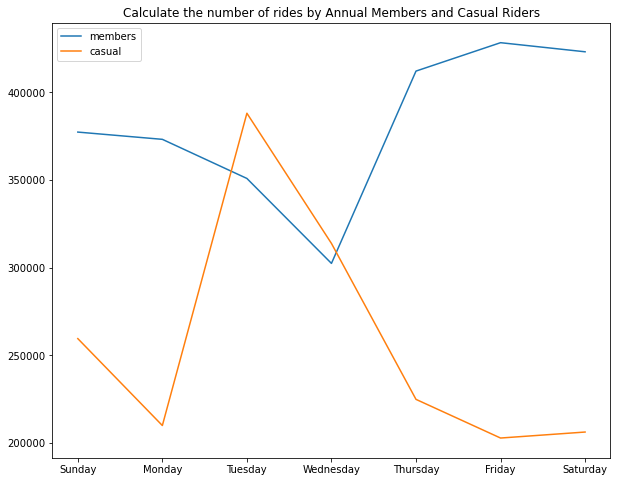

In [38]:
plt.figure(figsize = (10,8))
plt.plot(count_members.index, count_members.values)
plt.plot(count_casuals.index, count_casuals.values)
plt.title('Calculate the number of rides by Annual Members and Casual Riders')
plt.legend(['members', 'casual'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(count_casuals.index, labels)
plt.show()

In [39]:
# check the number of users in each type over the past 12 months
user_types = cyclistic_data['member_casual'].value_counts()
user_types

member    2667840
casual    1805763
Name: member_casual, dtype: int64

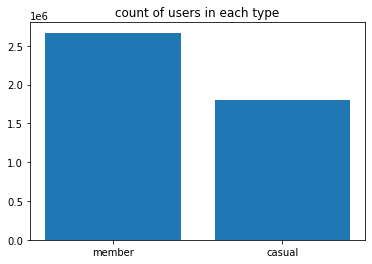

In [40]:
# to plot the bar chart of the number of users in each type over the past 12 months

plt.title('count of users in each type')
plt.bar(user_types.index, user_types.values)
plt.show()

In [41]:
# calculate the average ride length for members in a week
user_avg_members = cyclistic_data[cyclistic_data['member_casual'] == 'member'].groupby('day_name')['ride_length'].mean()
user_avg_members

day_name
Friday      0 days 00:12:12.500378916
Monday      0 days 00:12:03.545892218
Saturday    0 days 00:14:03.041431111
Sunday      0 days 00:13:56.658885796
Thursday    0 days 00:12:01.413960337
Tuesday     0 days 00:11:49.121277271
Wednesday   0 days 00:11:52.664480104
Name: ride_length, dtype: timedelta64[ns]

In [43]:
# calculate the average ride length for casual riders in a week
user_avg_casuals = cyclistic_data[cyclistic_data['member_casual'] == 'casual'].groupby('day_name')['ride_length'].mean(numeric_only=False)
user_avg_casuals

day_name
Friday      0 days 00:23:09.614696852
Monday      0 days 00:25:44.624887509
Saturday    0 days 00:27:38.650829719
Sunday      0 days 00:28:31.219405895
Thursday    0 days 00:22:04.039512758
Tuesday     0 days 00:22:13.761504110
Wednesday   0 days 00:21:31.480867853
Name: ride_length, dtype: timedelta64[ns]

<function matplotlib.pyplot.show(close=None, block=None)>

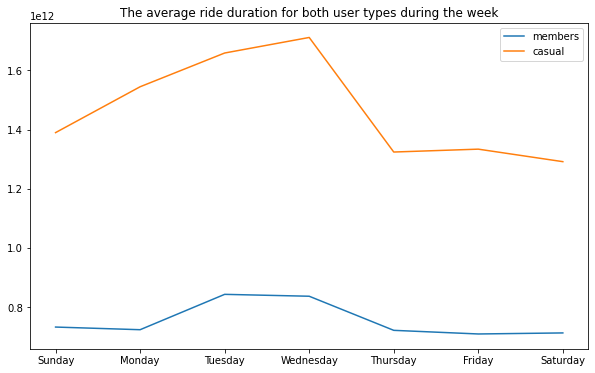

In [44]:
# plot the average ride_length for different users during the week
plt.figure(figsize = (10,6))
plt.plot(user_avg_members)
plt.plot(user_avg_casuals)
plt.title('The average ride duration for both user types during the week')
plt.legend(['members', 'casual'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(user_avg_members.index, labels)
plt.show

In [45]:
cyclistic_data.groupby('member_casual')['rideable_type'].value_counts()

member_casual               
casual         classic_bike      938233
               electric_bike     677633
               docked_bike       189897
member         classic_bike     1796935
               electric_bike     870905
               docked_bike            0
Name: rideable_type, dtype: int64

# How many rides were booked per month by Casual or Member riders? 

In [46]:
cyclistic_data.pivot_table(index='month', columns='member_casual', values='ride_id', aggfunc='count')

member_casual,casual,member
month,,
1,12603,67506
2,15142,74020
3,67141,148802
4,91884,180638
5,220225,282260
6,292038,328247
7,311650,330977
8,270067,335201
9,220899,314196


In [48]:
table = pd.pivot_table(cyclistic_data, index=['member_casual', 'month'], values='ride_id', aggfunc='count')
table

ride_id
member_casual month         
casual        1        12603
              2        15142
              3        67141
              4        91884
              5       220225
              6       292038
              7       311650
              8       270067
              9       220899
              10      189093
              11       69953
              12       45068
member        1        67506
              2        74020
              3       148802
              4       180638
              5       282260
              6       328247
              7       330977
              8       335201
              9       314196
              10      288820
              11      185902
              12      131271

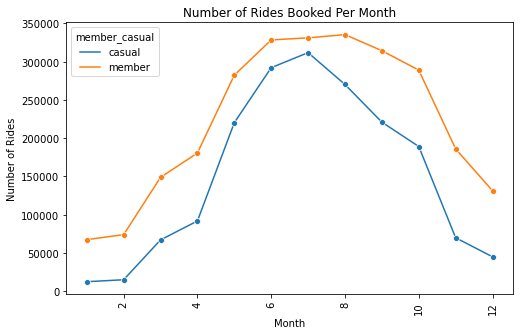

In [49]:
plt.figure(figsize=(8,5))
gr = sns.lineplot(data=table.reset_index(), x='month', y='ride_id', hue='member_casual', marker="o")
plt.title('Number of Rides Booked Per Month')
plt.xticks (rotation='vertical', size=10)
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.show()

# What is the total number of rides booked per month?

In [51]:
import sort_dataframeby_monthorweek as sd

In [54]:
group = cyclistic_data.groupby('month')['ride_id'].count()
group

month
1      80109
2      89162
3     215943
4     272522
5     502485
6     620285
7     642627
8     605268
9     535095
10    477913
11    255855
12    176339
Name: ride_id, dtype: int64

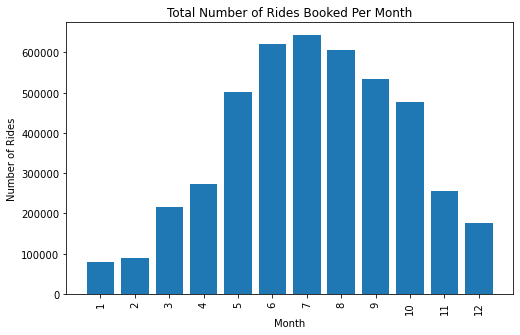

In [58]:
plt.figure(figsize=(8,5))
month = [month for month, cyclistic_data in cyclistic_data.groupby('month')]
plt.title('Total Number of Rides Booked Per Month')
plt.bar(month, group)
plt.xticks(month, rotation='vertical', size=10)
plt.ylabel('Number of Rides')
plt.xlabel('Month')


plt.show()

# What is the total number of rides booked per day?

In [59]:
cyclistic_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,start_date,day_name,year,month
271143,ABA2BDC3595FC3E9,classic_bike,2021-10-01 00:00:09,2021-10-01 00:10:12,Morgan St & Lake St,TA1306000015,Noble St & Milwaukee Ave,13290,casual,0 days 00:10:03,2021-10-01,Friday,2021,10
117528,0BE9C131A5705D92,classic_bike,2021-10-01 00:00:16,2021-10-01 00:05:29,Damen Ave & Cortland St,13133,Winchester Ave & Elston Ave,KA1504000140,casual,0 days 00:05:13,2021-10-01,Friday,2021,10
341788,74483AC18C8C6B90,classic_bike,2021-10-01 00:00:18,2021-10-01 00:08:52,Halsted St & Roscoe St,TA1309000025,Greenview Ave & Diversey Pkwy,13294,casual,0 days 00:08:34,2021-10-01,Friday,2021,10
200504,F8DBF095F01E1B68,classic_bike,2021-10-01 00:02:22,2021-10-01 00:06:40,Pine Grove Ave & Irving Park Rd,TA1308000022,Clarendon Ave & Junior Ter,13389,member,0 days 00:04:18,2021-10-01,Friday,2021,10
21249,B0B9EB7622461EF4,classic_bike,2021-10-01 00:02:27,2021-10-01 00:17:56,MLK Jr Dr & 29th St,TA1307000139,Clinton St & Roosevelt Rd,WL-008,member,0 days 00:15:29,2021-10-01,Friday,2021,10


In [62]:
cyclistic_data.pivot_table(index='day_name', values='ride_id', aggfunc='count')

,ride_id
day_name,
Friday,636985
Monday,583272
Saturday,739087
Sunday,616378
Thursday,637122
Tuesday,631266
Wednesday,629493


In [63]:
group1 = cyclistic_data.groupby('day_name')['ride_id'].count()
group1

day_name
Friday       636985
Monday       583272
Saturday     739087
Sunday       616378
Thursday     637122
Tuesday      631266
Wednesday    629493
Name: ride_id, dtype: int64

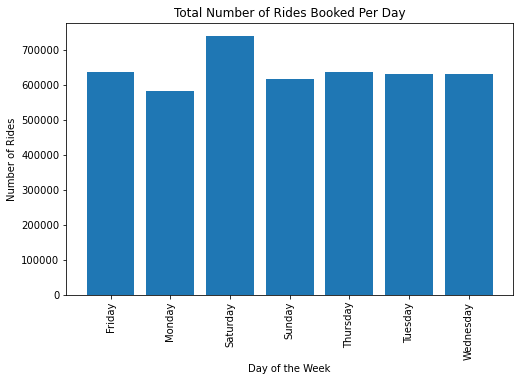

In [67]:
plt.figure(figsize=(8,5))
weekday = [weekday for weekday, cyclistic_data in cyclistic_data.groupby('day_name')] # This arranges the weekdays in the right order
plt.title('Total Number of Rides Booked Per Day')
plt.bar(weekday, group1)
plt.xticks(weekday, rotation='vertical', size=10)
plt.ylabel('Number of Rides')
plt.xlabel('Day of the Week')
plt.ticklabel_format(useOffset=False, style='plain', axis='y') #Make value on y axis to be plain and not exponential

plt.show()

# What type of bike was mostly used?

In [68]:
cyclistic_data.pivot_table(index='rideable_type', columns='member_casual', values='ride_length')

member_casual,casual,member
rideable_type,,
classic_bike,0 days 00:24:36.549684353,0 days 00:13:09.165781733
docked_bike,0 days 00:54:03.805478759,NaT
electric_bike,0 days 00:17:12.382820789,0 days 00:11:06.081547355


In [70]:
cyclistic_data['ride_length_minutes'] = cyclistic_data['ride_length'].dt.total_seconds()/60
cyclistic_data.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,start_date,day_name,year,month,ride_length_minutes
271143,ABA2BDC3595FC3E9,classic_bike,2021-10-01 00:00:09,2021-10-01 00:10:12,Morgan St & Lake St,TA1306000015,Noble St & Milwaukee Ave,13290,casual,0 days 00:10:03,2021-10-01,Friday,2021,10,10.050000
117528,0BE9C131A5705D92,classic_bike,2021-10-01 00:00:16,2021-10-01 00:05:29,Damen Ave & Cortland St,13133,Winchester Ave & Elston Ave,KA1504000140,casual,0 days 00:05:13,2021-10-01,Friday,2021,10,5.216667
341788,74483AC18C8C6B90,classic_bike,2021-10-01 00:00:18,2021-10-01 00:08:52,Halsted St & Roscoe St,TA1309000025,Greenview Ave & Diversey Pkwy,13294,casual,0 days 00:08:34,2021-10-01,Friday,2021,10,8.566667
200504,F8DBF095F01E1B68,classic_bike,2021-10-01 00:02:22,2021-10-01 00:06:40,Pine Grove Ave & Irving Park Rd,TA1308000022,Clarendon Ave & Junior Ter,13389,member,0 days 00:04:18,2021-10-01,Friday,2021,10,4.300000
21249,B0B9EB7622461EF4,classic_bike,2021-10-01 00:02:27,2021-10-01 00:17:56,MLK Jr Dr & 29th St,TA1307000139,Clinton St & Roosevelt Rd,WL-008,member,0 days 00:15:29,2021-10-01,Friday,2021,10,15.483333


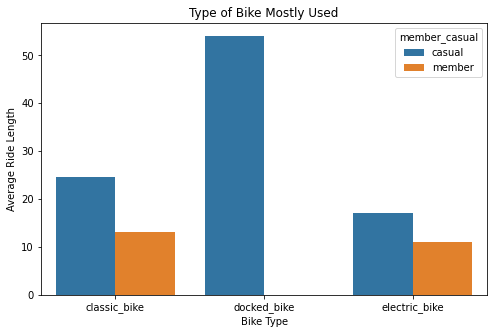

In [71]:
table = pd.pivot_table(cyclistic_data, index=['rideable_type', 'member_casual'], values='ride_length_minutes')

plt.figure(figsize=(8,5))
ax = sns.barplot(data=table.reset_index(), x='rideable_type', y='ride_length_minutes', hue='member_casual')
plt.title('Type of Bike Mostly Used')

plt.xlabel("Bike Type")
plt.ylabel("Average Ride Length")

plt.show()

# CONCLUSION

Casual riders use more docked bikes than classic and electric bikes as docked bikes are easily accessible. You can get bikes at any docking station unlike Casual and Electric bikes.

Member riders use more Classic and Electric bikes because the classic bikes are cost effficient as they are mostly undocked so you can just park it anywhere and not bother about docking it at a docking station before the time runs out. They also use electric bikes because they are fast and help them commute to work faster with less energy spent cycling.

Member riders bookes more rides during weekend as they want to enjoy the leisure of the weekend and spend more time outside.

Average ride duration of causal riders is more than member riders as member riders tend to go for work and return home from work.